# Data Exploration for Iris dataset

The Iris dataset is a famous example dataset used to demonstrate statistical methods. For this activity we are going to think of ways in which we visualise and summarise this dataset.

## Background

Iris is a type of flowering plant with 310 different species, all of which have extravagant flowers. Three species of Iris are shown below:

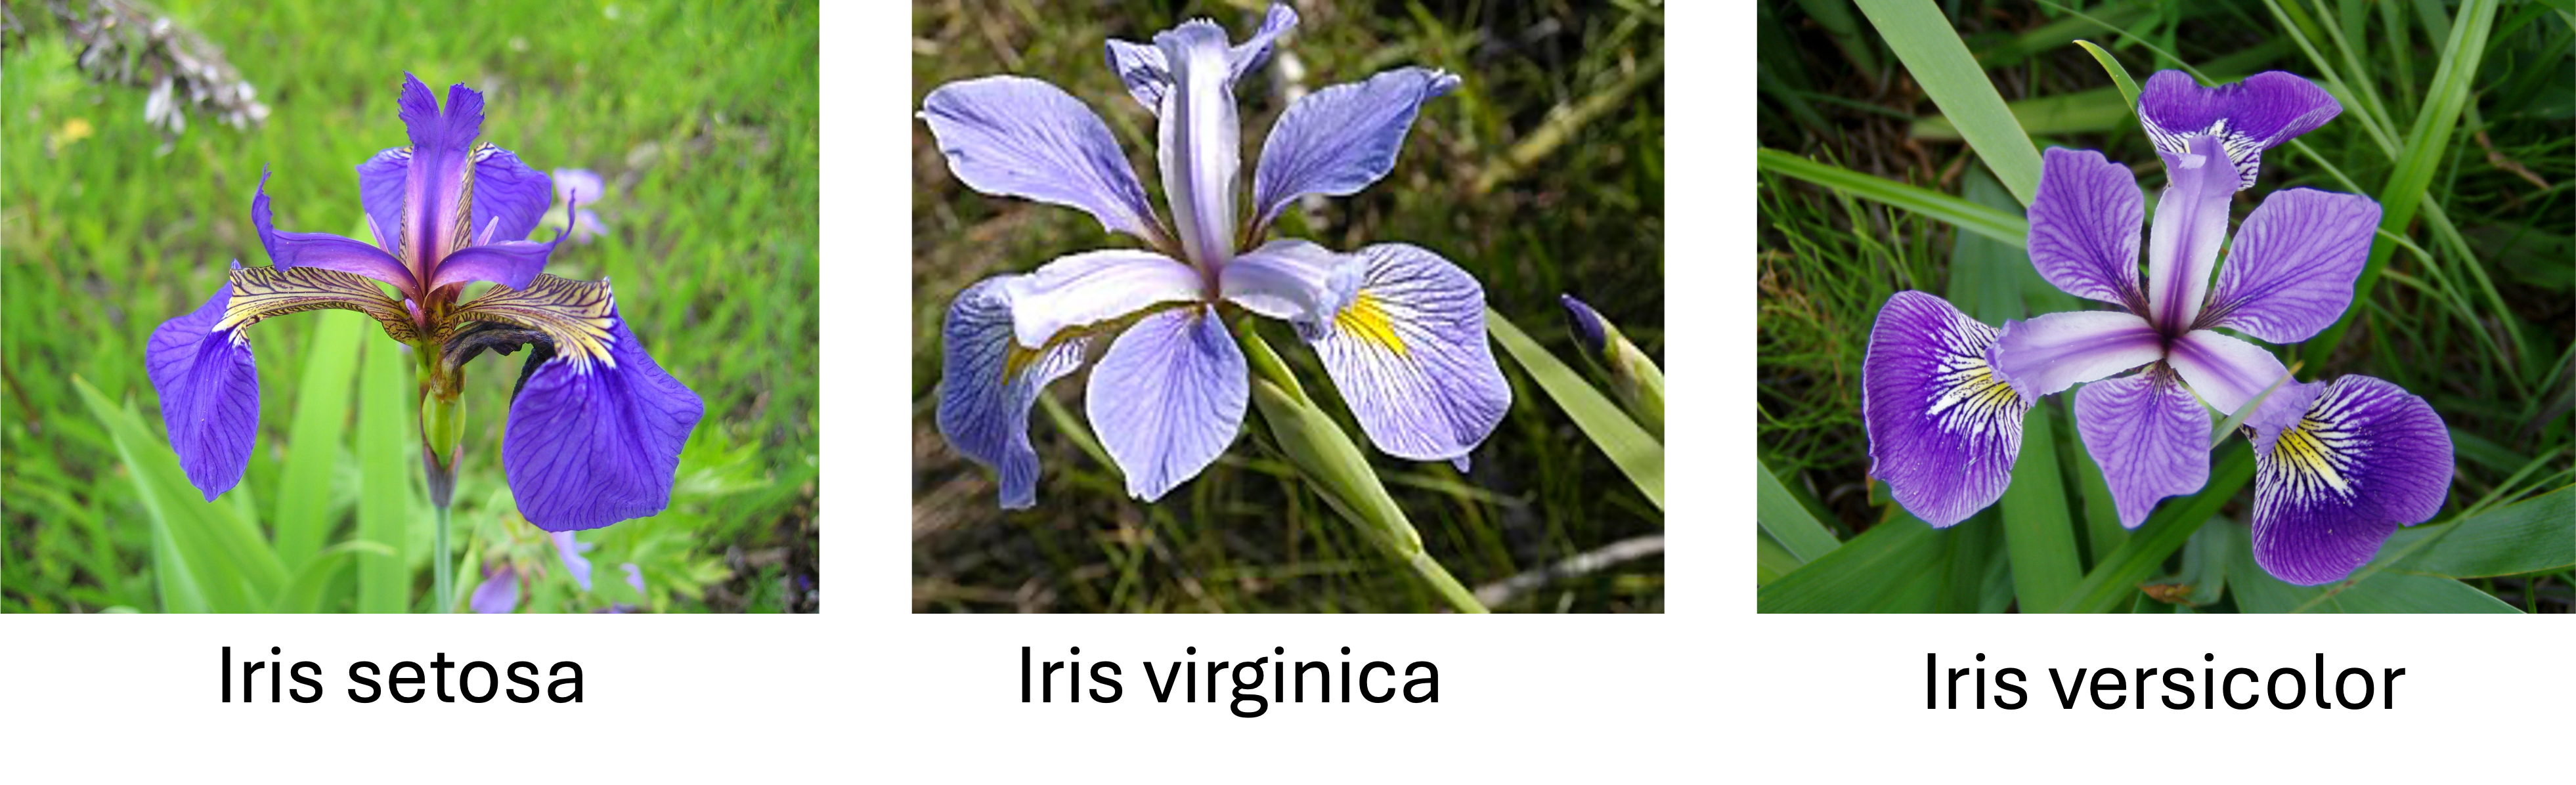

As shown in the diagram below flowers contain two types of modified leaves: sepals and petals. Sepals protect the flower before blooming, and petals attract pollinators.

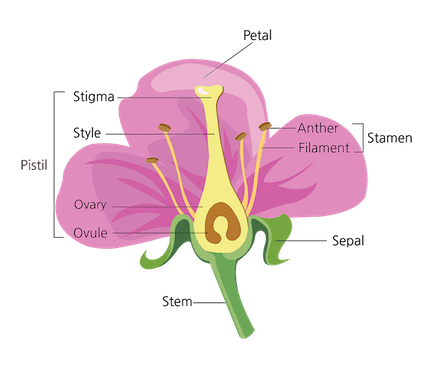

The Iris dataset contains measurements of sepal and petal width and length from the three Iris species shown above. These measurements can be used to determine which species of Iris a specific flower belongs to. But to find out how we can use these data we first have to get a better idea of what the data looks like and how measurements from different species are different (or even if they are any different).

## Loading the data


In [5]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# load the 'iris' dataset
iris = sns.load_dataset('iris')
# split by species
species = iris.groupby('species')

In [8]:
# Display the first 5 rows of the dataframe for each species and the mean for each measurement
for s, df in species:
    print('\033[1m' + s.capitalize() + '\033[0m')
    print(df.head())
    print('sepal length (cm): {:.2f}, sepal width (cm): {:.2f}, petal length (cm): {:.2f}, petal width (cm): {:.2f}'.format(df['sepal_length'].mean(),
                                                        df['sepal_width'].mean(),df['petal_length'].mean(),df['petal_width'].mean()))
    print()

Setosa
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
sepal length (cm): 5.01, sepal width (cm): 3.43, petal length (cm): 1.46, petal width (cm): 0.25

Versicolor
    sepal_length  sepal_width  petal_length  petal_width     species
50           7.0          3.2           4.7          1.4  versicolor
51           6.4          3.2           4.5          1.5  versicolor
52           6.9          3.1           4.9          1.5  versicolor
53           5.5          2.3           4.0          1.3  versicolor
54           6.5          2.8           4.6          1.5  versicolor
sepal length (cm): 5.94, sepal width (cm): 2.77, petal length (cm): 4.26, petal width 

Validation accuracy: 97.37 %


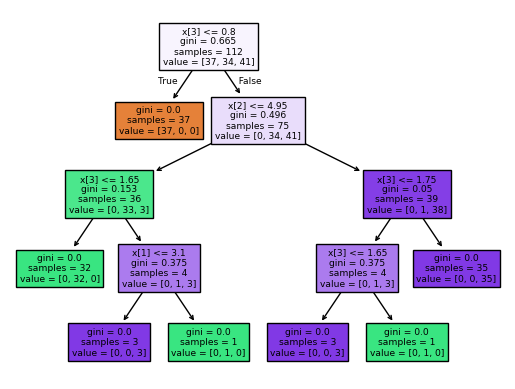

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import tree


features = ['sepal_length','sepal_width','petal_length', 'petal_width']
X = iris[features].values
y = iris['species'].values

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
# model = RandomForestClassifier(n_estimators=100, random_state=0)
clf= DecisionTreeClassifier(random_state = 0)
clf.fit(train_X, train_y)

val_predictions = clf.predict(val_X)
# print(mean_absolute_error(val_y, val_predictions))
val_acc = sum(val_predictions == val_y)/len(val_y)
print(f'Validation accuracy: {val_acc * 100 :.2f} %')
tree.plot_tree(clf, label='all', filled=True);

In [60]:
from sklearn.datasets import load_iris

iris = load_iris()

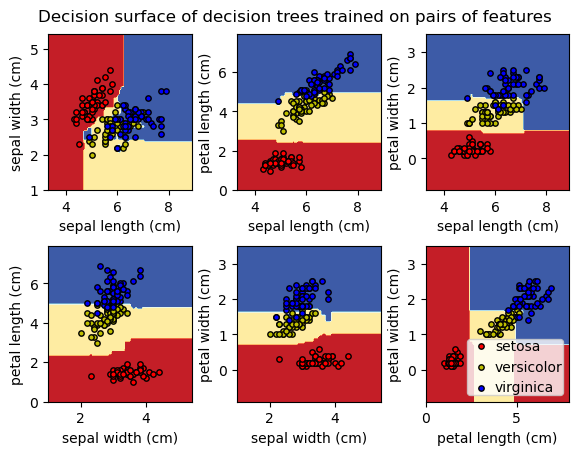

In [63]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    # clf = DecisionTreeClassifier().fit(X, y)
    clf = RandomForestClassifier(n_estimators=100, random_state=0).fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.asarray(y == i).nonzero()
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")